#### The Geometric & Exponential Distributions

##### The geometric and exponential distributions model the time it takes for an event to occur. The geometric distribution is discrete and models the number of trials it takes to achieve a success in repeated experiments with a given probability of success. The exponential distribution is a continuous analog of the geometric distribution, and models the amount of time you have to wait before an event occurs given a certain occurrence rate.

##### We use the geom function to model the number of trials it takes to get a success when flipping a fair coin.

In [5]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "../../fonts/NanumGothic.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [16]:
import random
from scipy import stats
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

random.seed(12)

# head가 처음 나올 때까지 fair coin을 몇번 던지나 하는 experiment를 10000번 시행하는 모델이다.
flips_till_heads = stats.geom.rvs(size=10000, p=0.5)
print(pd.crosstab(index='counts', columns=flips_till_heads))

col_0     1     2     3    4    5    6   7   8   9   10  11  12  13
row_0                                                              
counts  5109  2435  1202  655  305  153  63  41  17   8   5   4   3


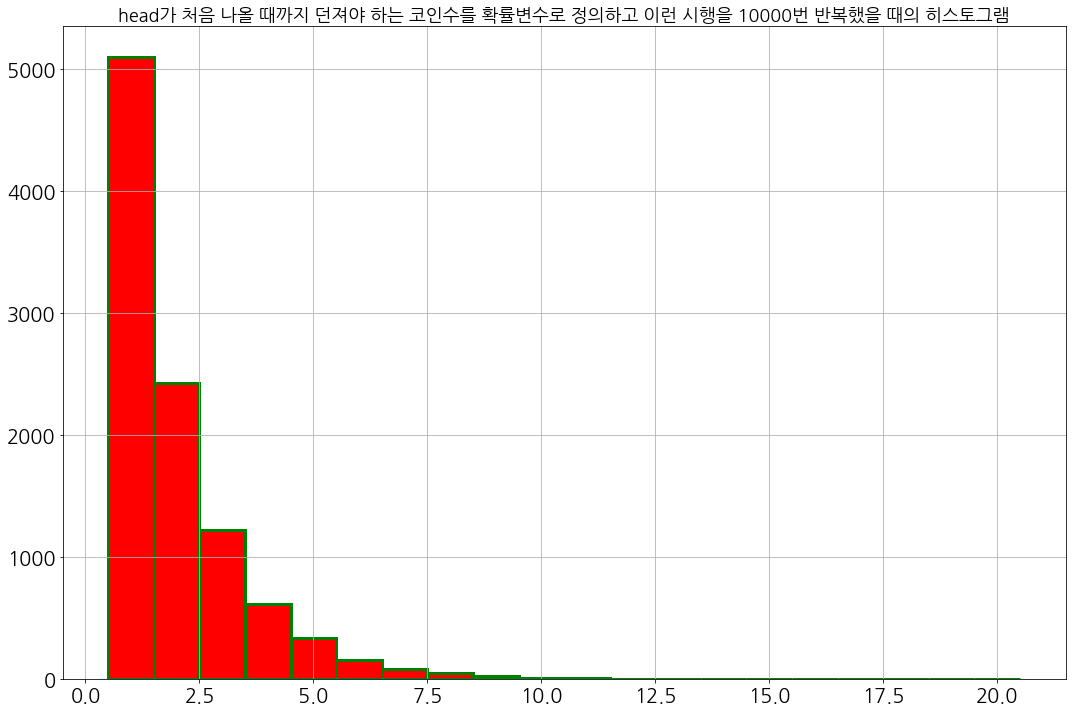

In [7]:
pd.DataFrame(data=flips_till_heads).hist(bins=20, range=(0.5, 20.5), color='red', linewidth=3,
                                         edgecolor='green', figsize=(15,10))
plt.tick_params(labelsize=20)
plt.title("head가 처음 나올 때까지 던져야 하는 코인수를 확률변수로 정의하고 이런 시행을 10000번 반복했을 때의 히스토그램",
          fontsize=18)
plt.tight_layout()
plt.show()

In [8]:
# 처음으로 head가 나올 때까지 던져야 하는 코인의 수가 5개 이하일 확률
first_five = stats.geom.cdf(k=5, p=0.5)

# 처음으로 head가 나올 때까지 던져야 하는 코인의 수가 6개 이상일 확률
more_than_five = 1 - first_five

print(f"던져야 하는 코인수가 5이하일 확률 : {first_five}\n던져야 하는 코인수가 6이상일 확률 : {more_than_five}")

던져야 하는 코인수가 5이하일 확률 : 0.96875
던져야 하는 코인수가 6이상일 확률 : 0.03125


In [9]:
# 처음으로 head가 나올 때까지 던져아 하는 코인의 수가 2개일 확률
first_two = stats.geom.pmf(k=2, p=0.5)
print(f"던져야 하는 코인수가 2일 확률 : {first_two}")

던져야 하는 코인수가 2일 확률 : 0.25


#### The Expenential Distribution

##### 한 시간에 평균 5번 오는 버스가 10분내에 올 확률($\lambda$ = 1/5)

In [27]:
less_than_ten = stats.expon.cdf(x=10/60, scale=0.2)
print(less_than_ten)

0.5654017914929217


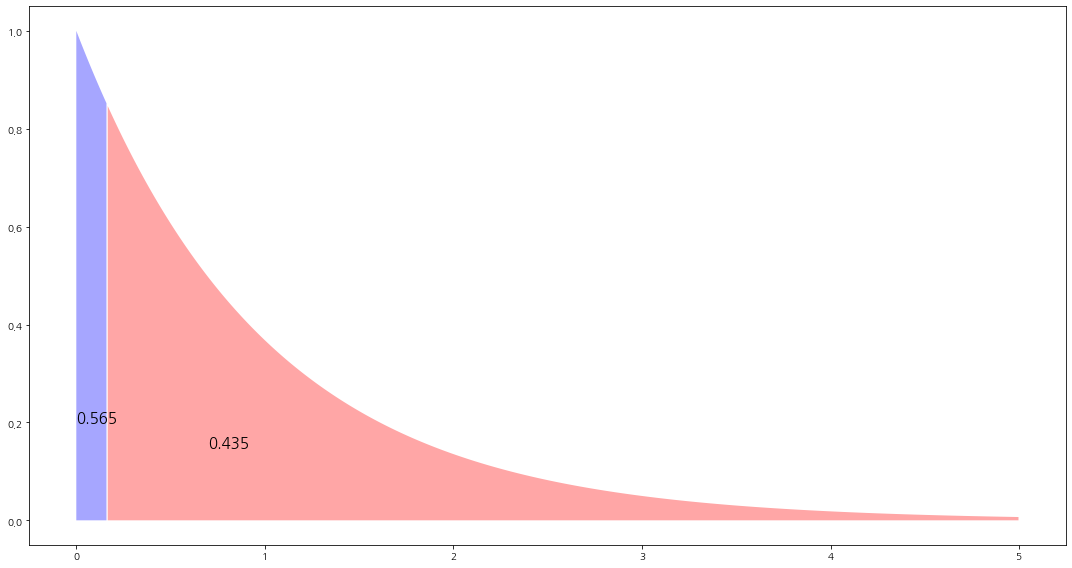

In [41]:
plt.rcParams["figure.figsize"] = (15, 8)

plt.fill_between(x=np.arange(0, 10/60, 0.01), y1=stats.expon.pdf(np.arange(0, 10/60, 0.01)), facecolor='blue', alpha=0.35)
plt.fill_between(x=np.arange(10/60, 5, 0.01), y1=stats.expon.pdf(np.arange(10/60, 5, 0.01)), facecolor='red', alpha=0.35)

plt.text(x=0, y=0.2, s=round(less_than_ten, 3), fontdict={'size':15})
plt.text(x=0.7, y=0.15, s=round(1-less_than_ten, 3), fontdict={'size':15})

plt.tight_layout()
plt.show()